### LIANA+ and CellPhoneDB

Dataset: https://github.com/AllenInstitute/abc_atlas_access/blob/main/descriptions/Zhuang-ABCA-1.md (section 80)

From https://liana-py.readthedocs.io/en/latest/notebooks/basic_usage.html

##### Benedetta Manzato (LUMC)

##### 12-06-2024

##### VIB Spatial omics Hackathon

In [1]:
import liana as li
import scanpy as sc
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from liana.mt import rank_aggregate
from liana.method import singlecellsignalr, connectome, cellphonedb, natmi, logfc, cellchat, geometric_mean

import warnings
warnings.filterwarnings('ignore')

Read data:

In [2]:
# read adata
adata = sc.read_h5ad('./data/processed/Zhuang_2023_merfish_brain.h5ad')

# log transform and set as X assay
adata.layers["log"] = np.log1p(adata.X)
adata.layers["raw"] = adata.X
adata.X = adata.layers["log"]

# change variable index to gene symbol
adata.var.index = adata.var['gene_symbol']

adata.obs.head()

,brain_section_label,brain_section_label_right,feature_matrix_label,donor_label,donor_genotype,donor_sex,cluster_alias,x,y,z,...,dataset_id,sample_id,donor_id,condition_id,tissue,organism,assay_ontology,assay,celltype,fov
cell_label,,,,,,,,,,,,,,,,,,,,,
299794030110334465835331169565547130392,Zhuang-ABCA-1.080,Zhuang-ABCA-1.080,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,196.0,5.873824,1.246374,6.757411,...,Zhuang_2023,Zhuang-ABCA-1,Zhuang-ABCA-1,normal,brain,Mus musculus,MERFISH,MERFISH,01 IT-ET Glut,Zhuang-ABCA-1.080
66045375924099067525605874805924532486,Zhuang-ABCA-1.080,Zhuang-ABCA-1.080,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,196.0,5.066814,1.215444,6.757411,...,Zhuang_2023,Zhuang-ABCA-1,Zhuang-ABCA-1,normal,brain,Mus musculus,MERFISH,MERFISH,01 IT-ET Glut,Zhuang-ABCA-1.080
116791314340621211157298988846240231316,Zhuang-ABCA-1.080,Zhuang-ABCA-1.080,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,196.0,4.681061,1.287158,6.757411,...,Zhuang_2023,Zhuang-ABCA-1,Zhuang-ABCA-1,normal,brain,Mus musculus,MERFISH,MERFISH,01 IT-ET Glut,Zhuang-ABCA-1.080
13950435409550353848526753205083905255,Zhuang-ABCA-1.080,Zhuang-ABCA-1.080,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,174.0,4.708601,1.292049,6.757411,...,Zhuang_2023,Zhuang-ABCA-1,Zhuang-ABCA-1,normal,brain,Mus musculus,MERFISH,MERFISH,01 IT-ET Glut,Zhuang-ABCA-1.080
147436316185400258367147717470263928395,Zhuang-ABCA-1.080,Zhuang-ABCA-1.080,Zhuang-ABCA-1,Zhuang-ABCA-1,wt/wt,F,174.0,4.729919,1.285492,6.757411,...,Zhuang_2023,Zhuang-ABCA-1,Zhuang-ABCA-1,normal,brain,Mus musculus,MERFISH,MERFISH,01 IT-ET Glut,Zhuang-ABCA-1.080


List Liana methods:

In [15]:
li.mt.show_methods()

,Method Name,Magnitude Score,Specificity Score,Reference
0,CellPhoneDB,lr_means,cellphone_pvals,"Efremova, M., Vento-Tormo, M., Teichmann, S.A...."
0,Connectome,expr_prod,scaled_weight,"Raredon, M.S.B., Yang, J., Garritano, J., Wang..."
0,log2FC,None,lr_logfc,"Dimitrov, D., Türei, D., Garrido-Rodriguez, M...."
0,NATMI,expr_prod,spec_weight,"Hou, R., Denisenko, E., Ong, H.T., Ramilowski,..."
0,SingleCellSignalR,lrscore,None,"Cabello-Aguilar, S., Alame, M., Kon-Sun-Tack, ..."
0,Rank_Aggregate,magnitude_rank,specificity_rank,"Dimitrov, D., Türei, D., Garrido-Rodriguez, M...."
0,Geometric Mean,lr_gmeans,gmean_pvals,CellPhoneDBv2's permutation approach applied t...
0,scSeqComm,inter_score,None,"Baruzzo, G., Cesaro, G., Di Camillo, B. 2022. ..."
0,CellChat,lr_probs,cellchat_pvals,"Jin, S., Guerrero-Juarez, C.F., Zhang, L., Cha..."


##### Run cellphonedb

In [16]:
cellphonedb(adata,
            groupby='celltype',
            # NOTE by default the resource uses HUMAN gene symbols
            resource_name='mouseconsensus',
            expr_prop=0.1,
            verbose=True, key_added='cpdb_res',
            use_raw=False)

Using `.X`!
Converting to sparse csr matrix!
The following cell identities were excluded: 10 LSX GABA, 16 HY MM Glut, 25 Pineal Glut
Using resource `mouseconsensus`.
0.83 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 37064 samples and 113 features


100%|██████████| 1000/1000 [00:23<00:00, 43.33it/s]


In [17]:
# liana's output in saved in a pandas df:
adata.uns['cpdb_res'].head()

,ligand,ligand_complex,ligand_means,ligand_props,receptor,receptor_complex,receptor_means,receptor_props,source,target,lr_means,cellphone_pvals
1428,Penk,Penk,2.750709,0.915226,Oprd1,Oprd1,1.433274,0.832268,09 CNU-LGE GABA,07 CTX-MGE GABA,2.091992,0.0
1482,Penk,Penk,2.329819,0.865526,Oprd1,Oprd1,1.433274,0.832268,13 CNU-HYa Glut,07 CTX-MGE GABA,1.881547,0.0
3434,Penk,Penk,2.750709,0.915226,Oprm1,Oprm1,0.697854,0.493865,09 CNU-LGE GABA,17 MH-LH Glut,1.724281,0.0
2908,Penk,Penk,2.750709,0.915226,Oprm1,Oprm1,0.689542,0.599022,09 CNU-LGE GABA,13 CNU-HYa Glut,1.720126,0.0
3805,Penk,Penk,2.750709,0.915226,Oprm1,Oprm1,0.675867,0.523810,09 CNU-LGE GABA,19 MB Glut,1.713288,0.0


In [18]:
# The following cell identities were excluded: 10 LSX GABA, 16 HY MM Glut, 25 Pineal Glut

source_target = ['01 IT-ET Glut','02 NP-CT-L6b Glut','07 CTX-MGE GABA','06 CTX-CGE GABA',
                 '04 DG-IMN Glut','18 TH Glut','17 MH-LH Glut','14 HY Glut','19 MB Glut',
                 '31 OPC-Oligo','12 HY GABA','09 CNU-LGE GABA','05 OB-IMN GABA','08 CNU-MGE GABA',
                 '11 CNU-HYa GABA','30 Astro-Epen','20 MB GABA','03 OB-CR Glut','13 CNU-HYa Glut',
                 '34 Immune','33 Vascular']
len(source_target)

21

Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


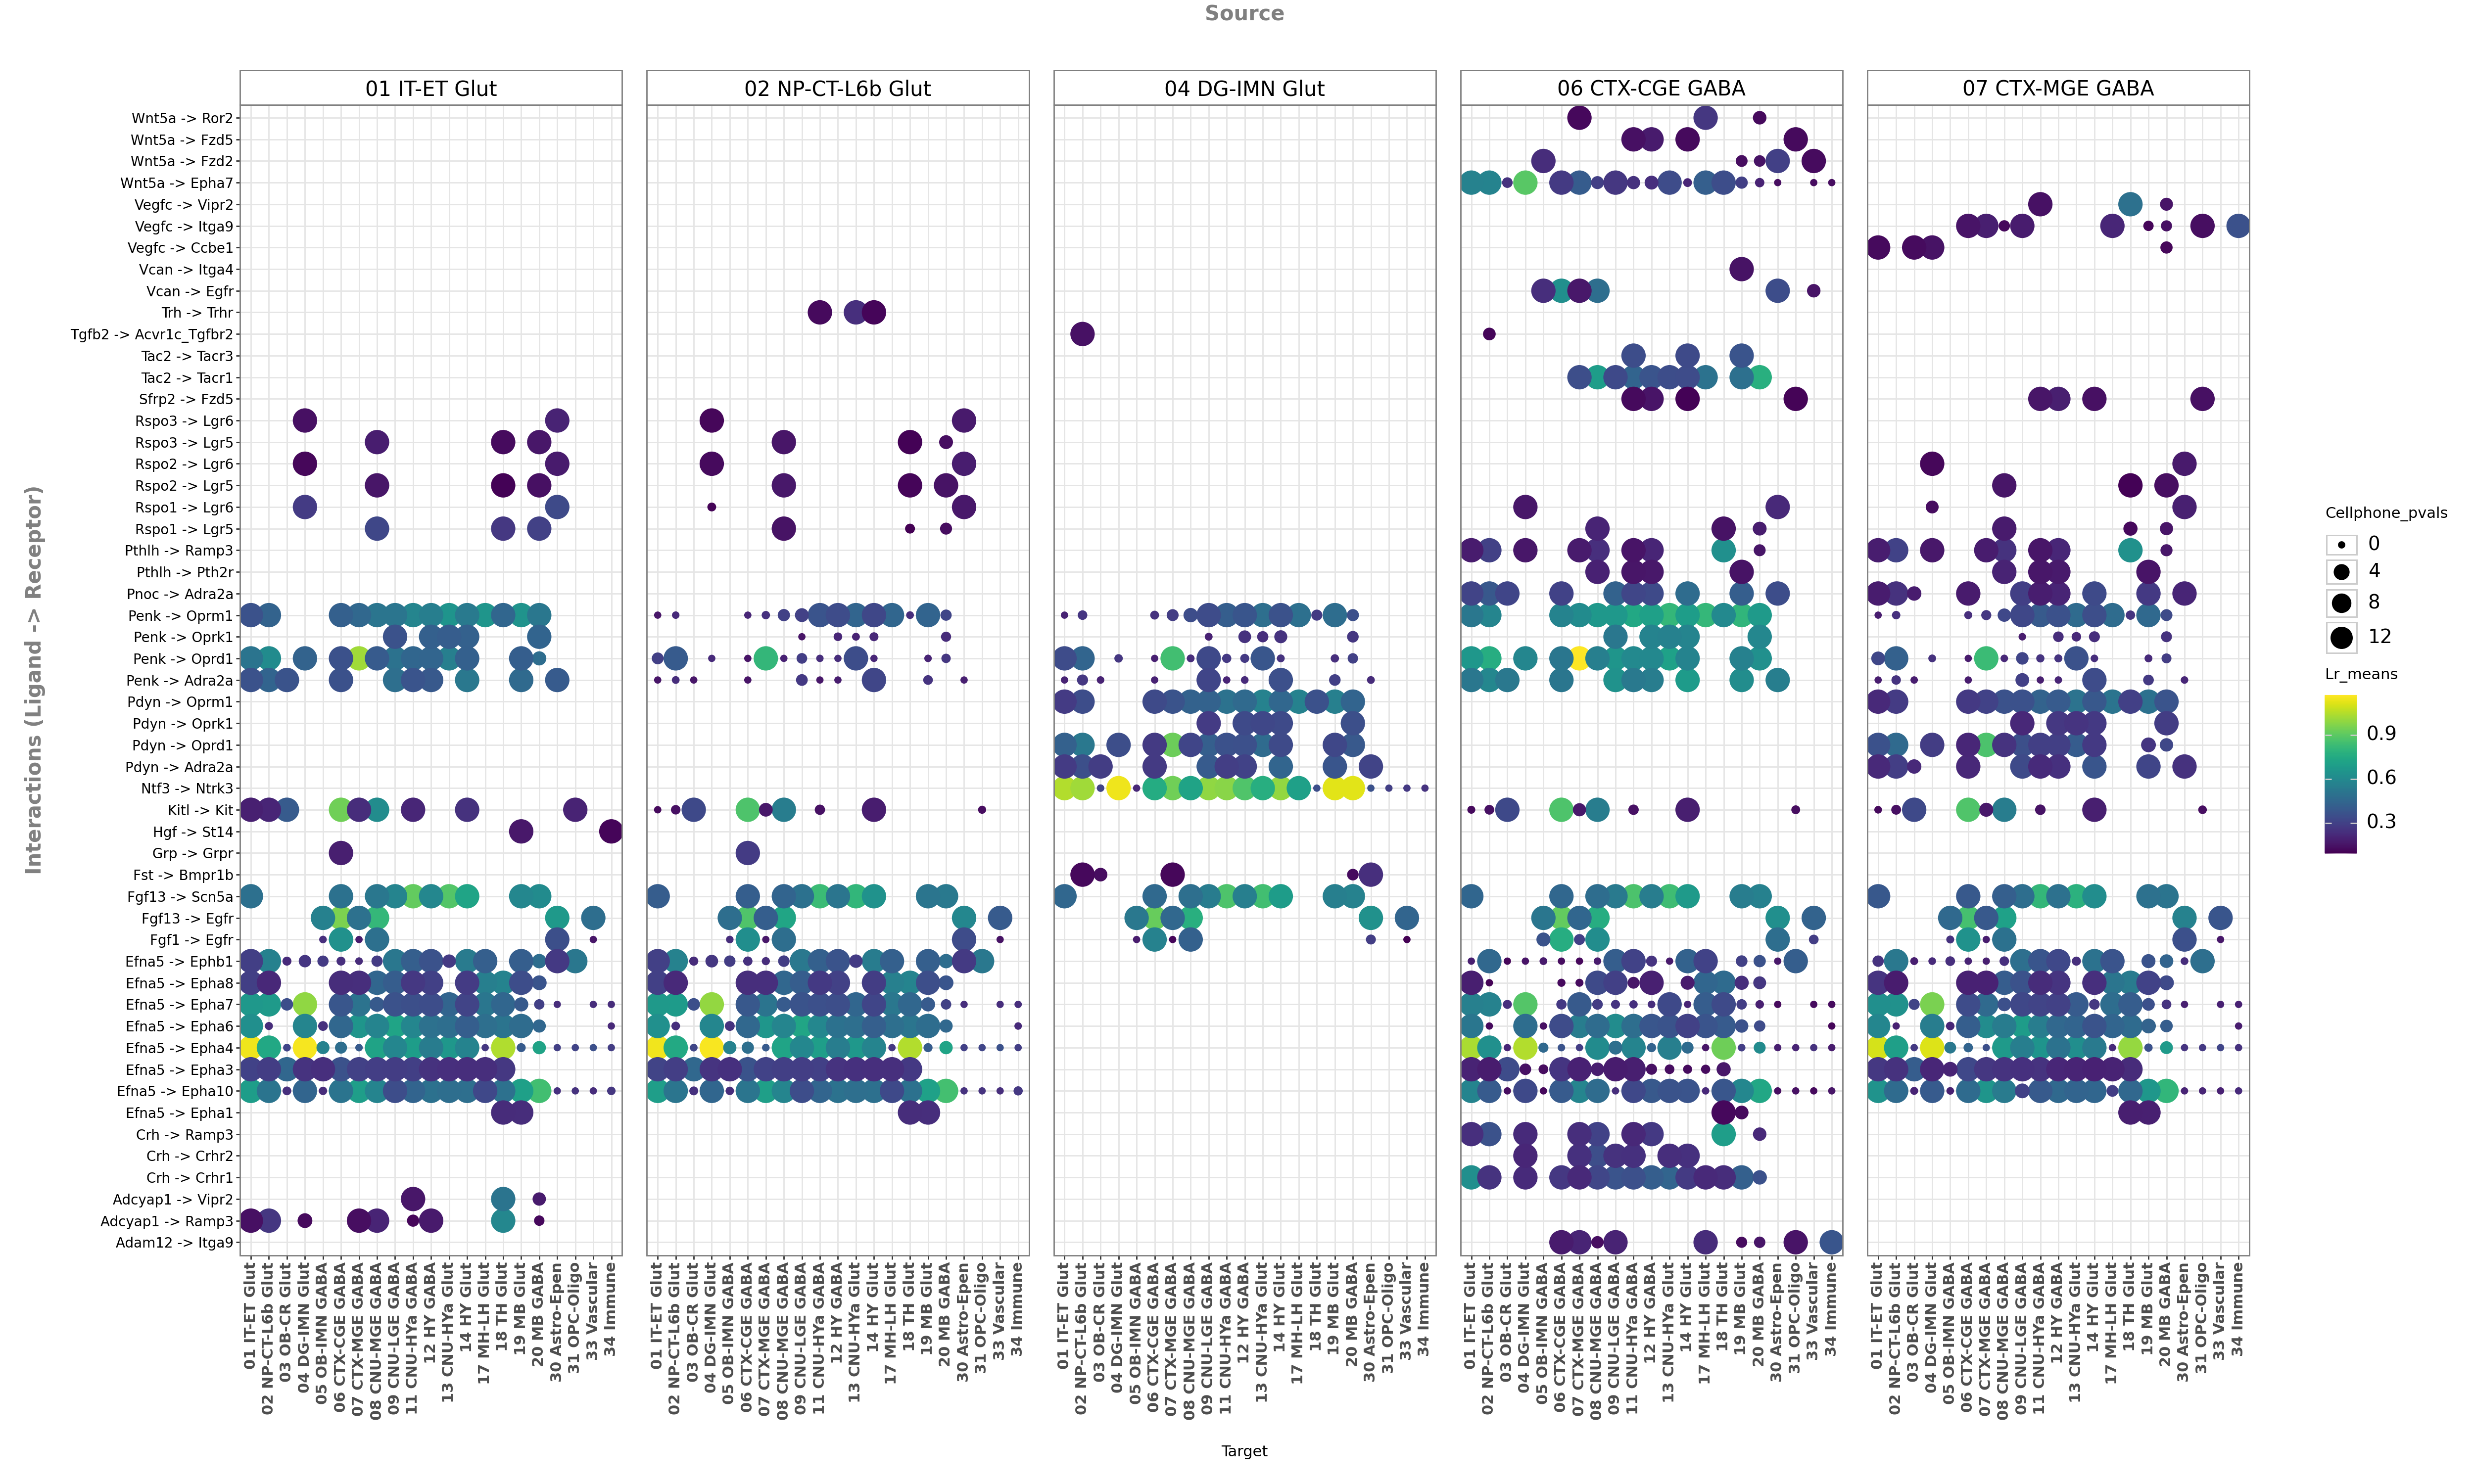

In [19]:
li.pl.dotplot(adata = adata,
              colour='lr_means',
              size='cellphone_pvals',
              inverse_size=True, # we inverse sign since we want small p-values to have large sizes
              source_labels=source_target[0:5],
              target_labels=source_target,
              figure_size=(25, 15),
              # finally, since cpdbv2 suggests using a filter to FPs
              # we filter the pvals column to <= 0.05
              filter_fun=lambda x: x['cellphone_pvals'] <= 0.05,
              uns_key='cpdb_res' # uns_key to use, default is 'liana_res'
             )

Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


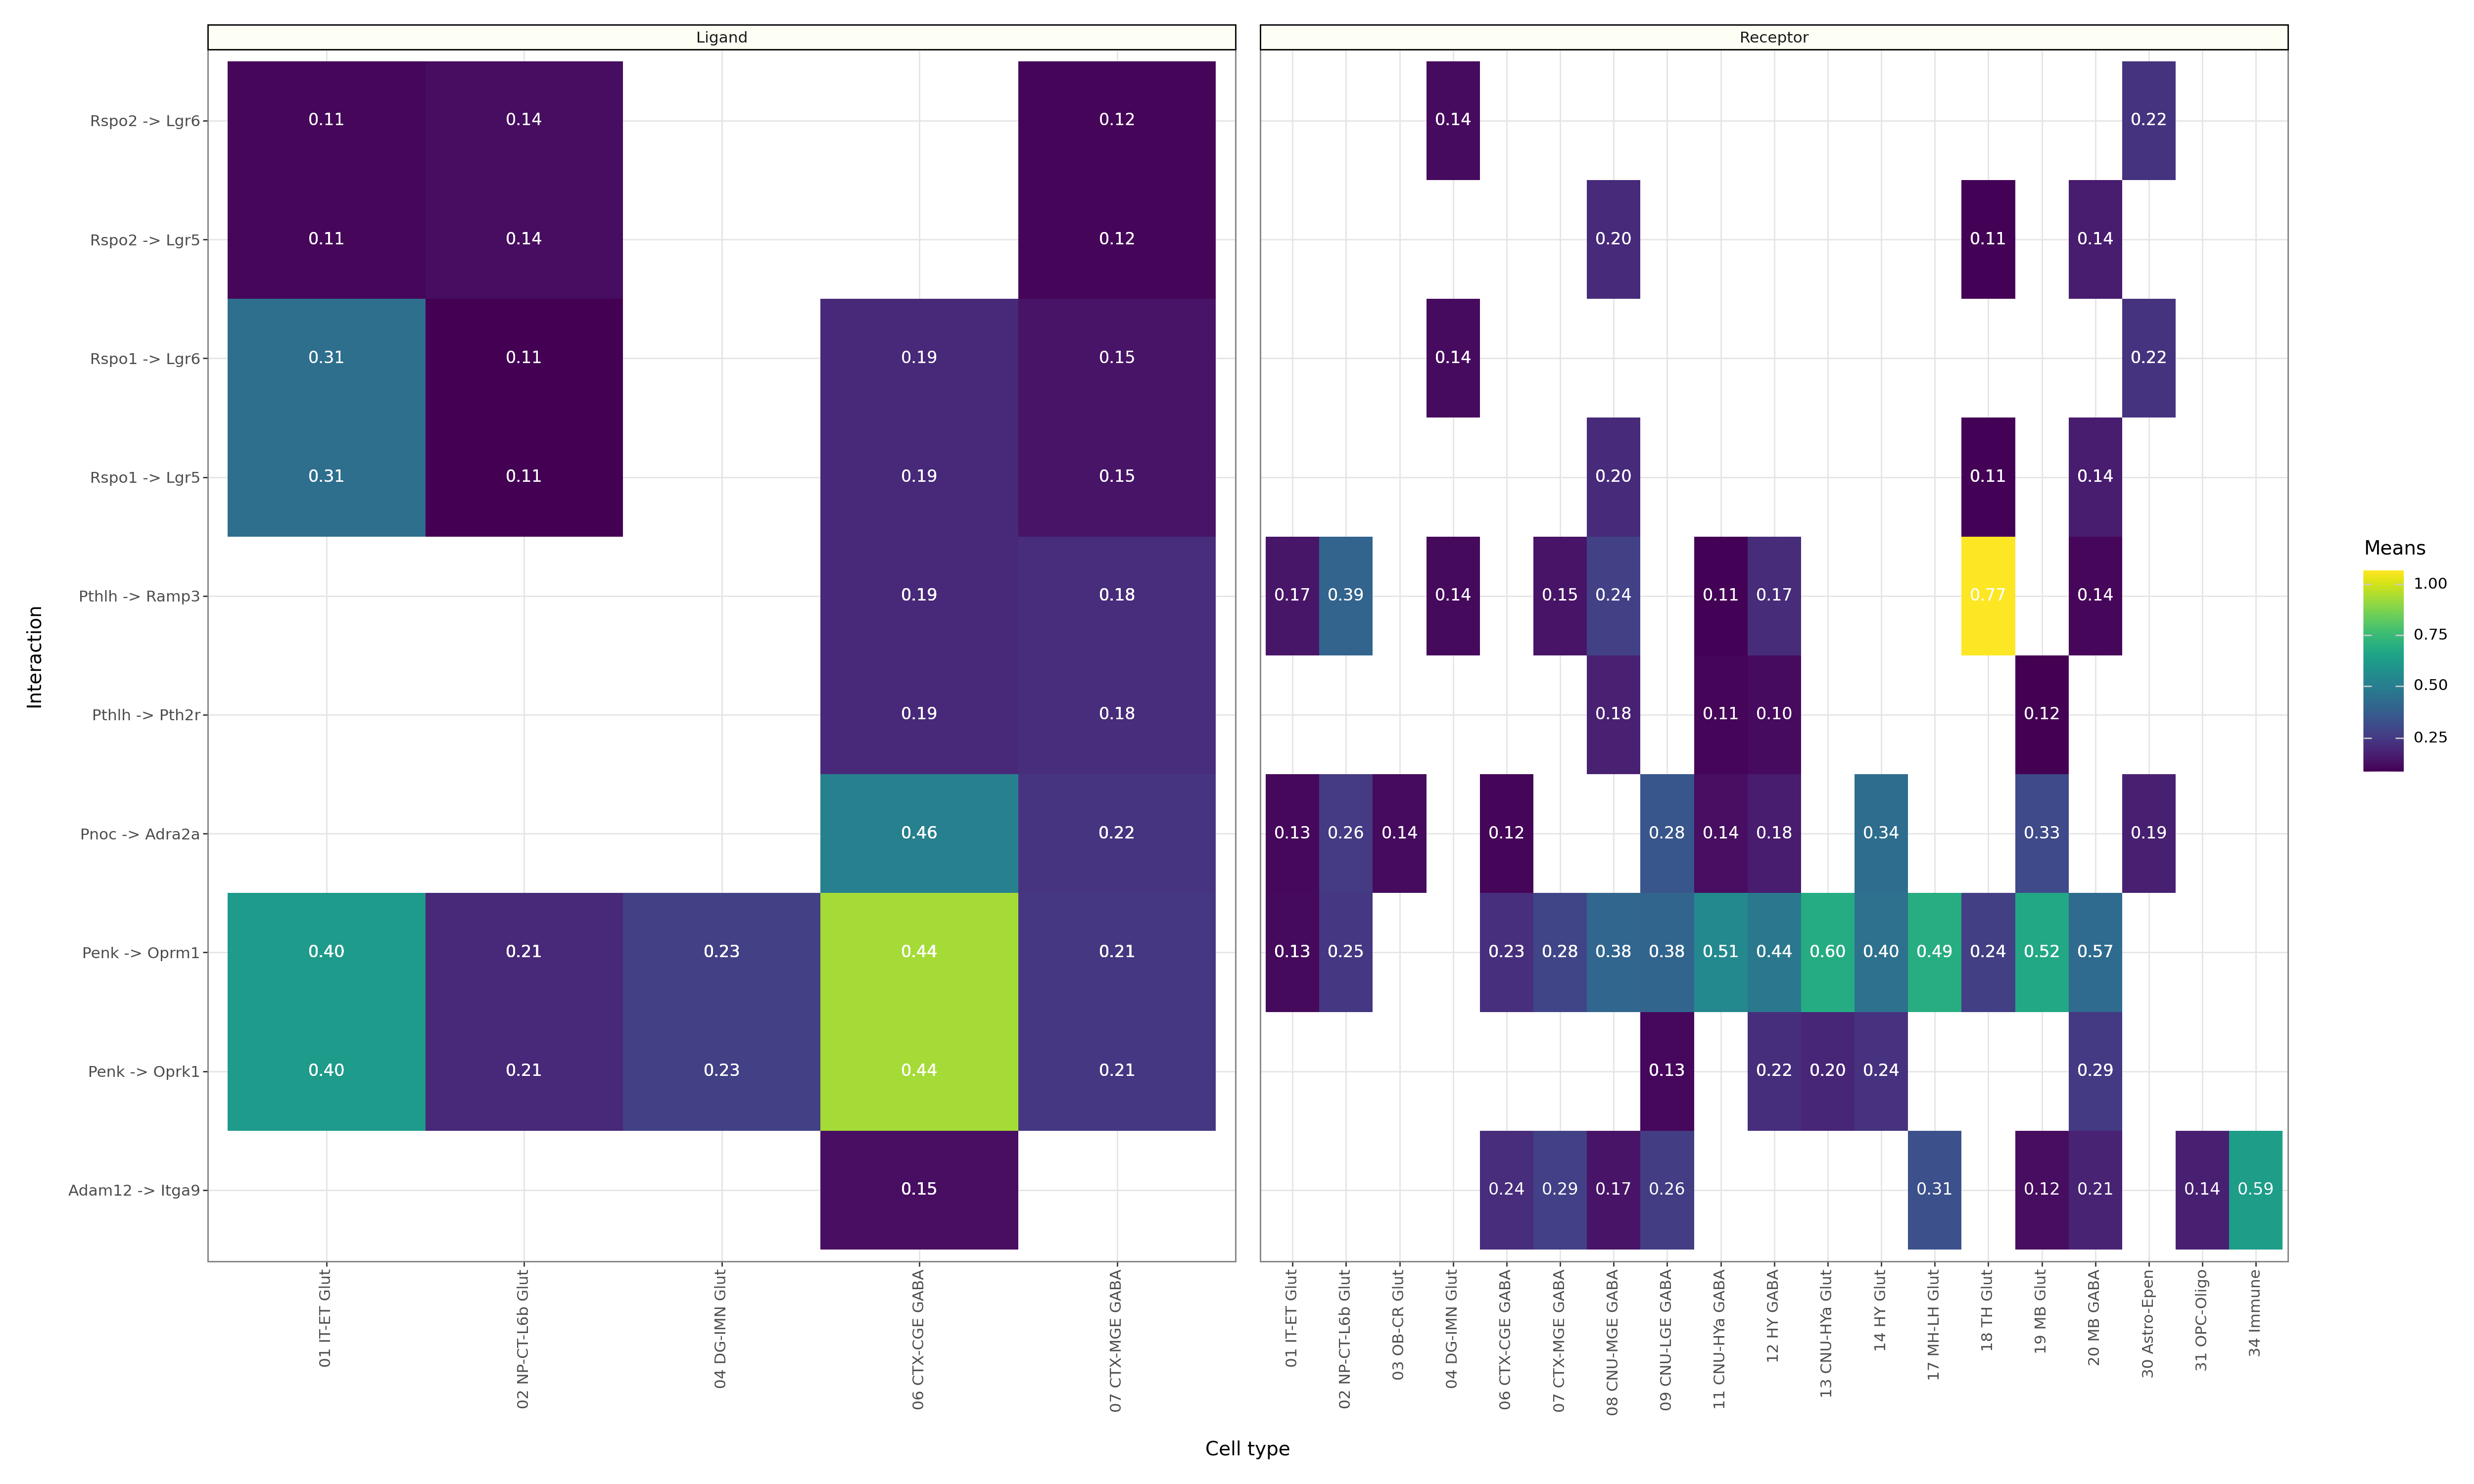

In [20]:
my_plot = li.pl.tileplot(adata = adata,
                         # NOTE: fill & label need to exist for both
                         # ligand_ and receptor_ columns
                         fill='means',
                         label='props',
                         label_fun=lambda x: f'{x:.2f}',
                         top_n=10,
                         orderby='cellphone_pvals',
                         orderby_ascending=True,
                         source_labels=source_target[0:5],
                         target_labels=source_target,
                         uns_key='cpdb_res', # NOTE: default is 'liana_res'
                         source_title='Ligand',
                         target_title='Receptor',
                         figure_size=(25, 15)
                         )
my_plot

##### Run rank_aggregate

LIANA also provides a consensus that integrates the predictions of individual methods. This is done by ranking and aggregating (RRA) the ligand-receptor interaction predictions from all methods.

In [21]:
adata.raw = adata

li.mt.rank_aggregate(adata,
                     groupby='celltype',
                     resource_name='mouseconsensus',
                     expr_prop=0.1,
                     verbose=True)

Using `.raw`!
Converting to sparse csr matrix!
The following cell identities were excluded: 10 LSX GABA, 16 HY MM Glut, 25 Pineal Glut
Using resource `mouseconsensus`.
0.83 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 37064 samples and 113 features
Assuming that counts were `natural` log-normalized!
Running CellPhoneDB


100%|██████████| 1000/1000 [00:21<00:00, 46.19it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR


Plot the most ‘relevant’ interactions ordered to the magnitude_rank results from aggregated_rank

Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


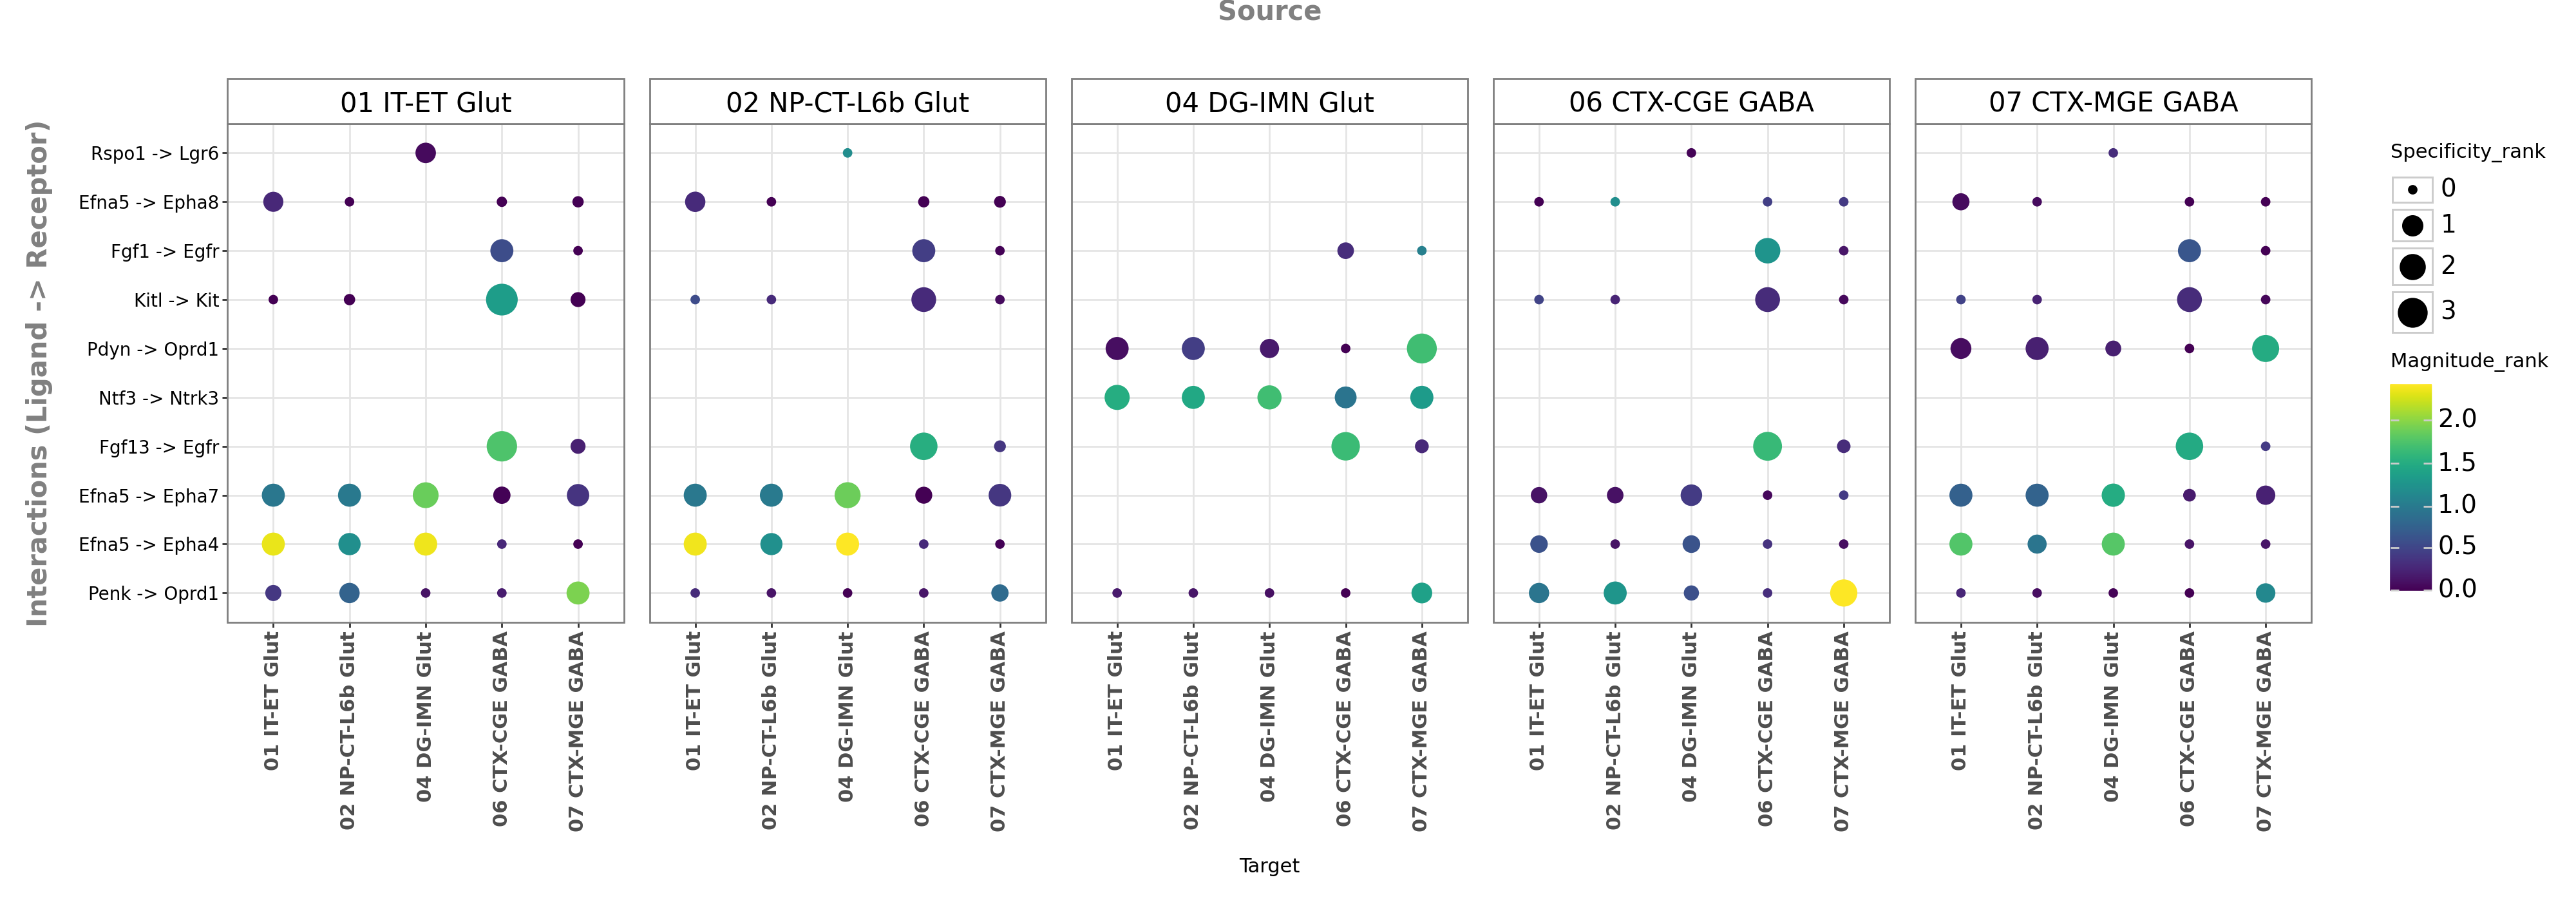

In [22]:
li.pl.dotplot(adata = adata,
              colour='magnitude_rank',
              size='specificity_rank',
              inverse_size=True,
              inverse_colour=True,
              source_labels=source_target[0:5],
              target_labels=source_target[0:5],
              top_n=10,
              orderby='magnitude_rank',
              orderby_ascending=True,
              figure_size=(20, 7)
             )

#### Use case: LR pair Nts-Ntsr2

In [23]:
# save lianas output in df
liana_res = adata.uns['cpdb_res']
# create synthetic columns for ligand-repair pairs and source-receptor cell types
liana_res['LR'] = liana_res['ligand']+'-'+liana_res['receptor']
liana_res['source-target'] = liana_res['source']+'-'+liana_res['receptor'] 

# subset for the pair Nts-Ntsr2
liana_res_nts_ntsr2 = liana_res[liana_res['LR']=='Nts-Ntsr2']
# pivot the df
pivot_nts_ntsr2 = liana_res_nts_ntsr2.pivot(index='source', columns='target', values='lr_means')
pivot_nts_ntsr2

target,01 IT-ET Glut,02 NP-CT-L6b Glut,03 OB-CR Glut,04 DG-IMN Glut,05 OB-IMN GABA,06 CTX-CGE GABA,07 CTX-MGE GABA,08 CNU-MGE GABA,09 CNU-LGE GABA,11 CNU-HYa GABA,...,13 CNU-HYa Glut,14 HY Glut,17 MH-LH Glut,18 TH Glut,19 MB Glut,20 MB GABA,30 Astro-Epen,31 OPC-Oligo,33 Vascular,34 Immune
source,,,,,,,,,,,,,,,,,,,,,
11 CNU-HYa GABA,0.334640,0.279610,0.441160,0.207206,0.241077,0.267365,0.263683,0.285739,0.277134,0.315931,...,0.336584,0.397665,0.234986,0.296925,0.484382,0.327543,1.158078,0.324579,0.380671,0.343359
12 HY GABA,0.313599,0.258569,0.420119,0.186165,0.220036,0.246324,0.242642,0.264698,0.256093,0.294890,...,0.315543,0.376624,0.213945,0.275884,0.463341,0.306502,1.137037,0.303538,0.359630,0.322318
14 HY Glut,0.285373,0.230343,0.391893,0.157939,0.191810,0.218098,0.214416,0.236472,0.227867,0.266664,...,0.287317,0.348398,0.185719,0.247658,0.435115,0.278276,1.108811,0.275312,0.331404,0.294092
19 MB Glut,0.309824,0.254794,0.416345,0.182390,0.216261,0.242549,0.238867,0.260923,0.252318,0.291115,...,0.311768,0.372849,0.210170,0.272109,0.459566,0.302728,1.133262,0.299763,0.355855,0.318543
20 MB GABA,0.270588,0.215558,0.377108,0.143154,0.177025,0.203313,0.199631,0.221687,0.213082,0.251879,...,0.272532,0.333613,0.170934,0.232873,0.420330,0.263491,1.094026,0.260527,0.316619,0.279307


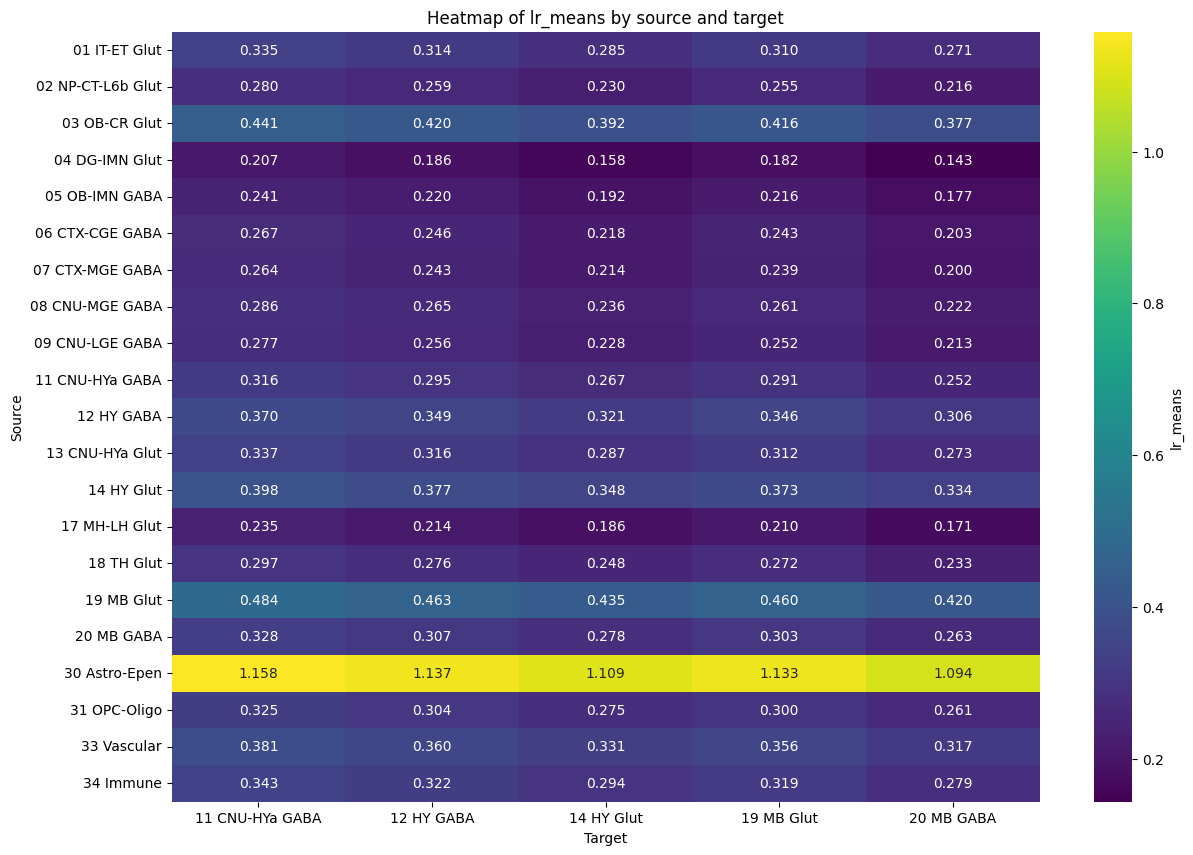

In [24]:
# heatmap of LR scores
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_nts_ntsr2.T, cmap='viridis', annot=True, fmt=".3f", cbar_kws={'label': 'lr_means'})
plt.title('Heatmap of lr_means by source and target')
plt.xlabel('Target')
plt.ylabel('Source')
plt.show()

#### Use case: LR pair Penk-Oprm1

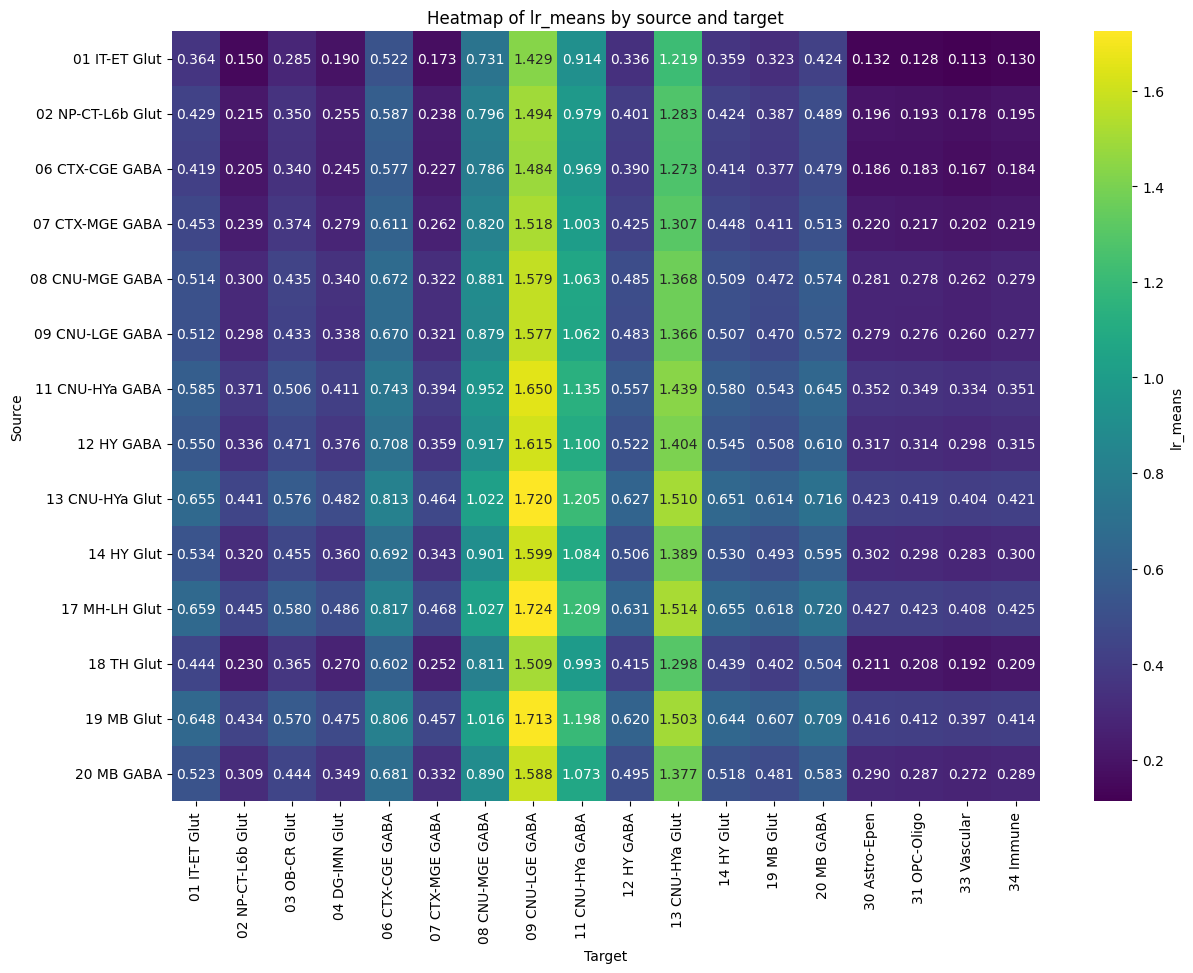

In [25]:
# subset Penk-Oprm1
liana_res_penk_oprm1 = liana_res[liana_res['LR']=='Penk-Oprm1']
# pivot the df
pivot_penk_oprm1 = liana_res_penk_oprm1.pivot(index='source', columns='target', values='lr_means')

# Create the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_penk_oprm1.T, cmap='viridis', annot=True, fmt=".3f", cbar_kws={'label': 'lr_means'})
plt.title('Heatmap of lr_means by source and target')
plt.xlabel('Target')
plt.ylabel('Source')
plt.show()